<a href="https://colab.research.google.com/github/Noor-Z1/Graduation-Project/blob/main/EDA_Opportunity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Data Preparation**

In [6]:
# this cell is for mounting the drive to access the data

from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **1.1 Install dependencies**

In [7]:
!pip install scikeras

In [8]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 1.2 Preprocessing the Sensors Data to a Pandas Dataframe

In [9]:
# this cell is for preprocessing the sensors_data.txt
# to understand the columns of sensors data check: column_names.txt

import pandas as pd

# we choose 1 to 250 as the column_names.txt has defined the columns in this way
start_column = 1
end_column = 250


def preprocess_sensors_data(file_path):
    # Generate column names as a range of numbers
    column_names = list(range(start_column, end_column + 1))
    df = pd.read_csv(file_path, sep=' ')
    df.columns = column_names
    return df

def concatenate_sensor_data(base_path, ranges):
  # Create an empty DataFrame with specified column names
    column_names = list(range(start_column, end_column + 1))
    df_concatenated = pd.DataFrame(columns=column_names)
    for range_tuple in ranges:
        for i in range_tuple[0]:
            for j in range_tuple[1]:
                file_path = f"{base_path}/S{i}-ADL{j}/S{i}-ADL{j}_sensors_data.txt"
                print(file_path)  # For demonstration, you can remove this line
                df = preprocess_sensors_data(file_path)  # Assuming preprocess_sensors_data is defined elsewhere
                df_concatenated = pd.concat([df_concatenated, df], ignore_index=True)
    return df_concatenated

# Define the ranges for different parts of the data
# here the first range will specify which range of subjects to look at
# and the second range will specify which range of ADLs for every subject to look at

# example usage for concatenating the sensor data of all runs of subjects 2 and 3
ranges = [(range(2, 4), range(1, 6))]

# Define the base path
base_path = '/content/gdrive/MyDrive/Opportunity_extracted/data'

# Call the function to concatenate the sensor data
df_concatenated = concatenate_sensor_data(base_path, ranges)

/content/gdrive/MyDrive/Opportunity_extracted/data/S2-ADL1/S2-ADL1_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S2-ADL2/S2-ADL2_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S2-ADL3/S2-ADL3_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S2-ADL4/S2-ADL4_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S2-ADL5/S2-ADL5_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S3-ADL1/S3-ADL1_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S3-ADL2/S3-ADL2_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S3-ADL3/S3-ADL3_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S3-ADL4/S3-ADL4_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S3-ADL5/S3-ADL5_sensors_data.txt


# 1.3 EDA

### *1.3.1 Subject 1*

In [10]:
subject1_df =  concatenate_sensor_data(base_path, [(range(1, 2), range(1, 6))])
print(subject1_df)

/content/gdrive/MyDrive/Opportunity_extracted/data/S1-ADL1/S1-ADL1_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S1-ADL2/S1-ADL2_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S1-ADL3/S1-ADL3_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S1-ADL4/S1-ADL4_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S1-ADL5/S1-ADL5_sensors_data.txt
            1      2      3      4     5       6      7      8       9    \
0            33  124.0  978.0 -389.0  -7.0  1014.0  199.0  124.0   968.0   
1            67  102.0  996.0 -440.0 -49.0  1024.0  193.0  127.0  1001.0   
2           100   59.0  861.0 -384.0  -9.0  1023.0  202.0  110.0  1007.0   
3           133  119.0  946.0 -426.0 -22.0  1026.0  188.0   98.0  1001.0   
4           167   99.0  972.0 -365.0  -3.0  1027.0  162.0   72.0   994.0   
...         ...    ...    ...    ...   ...     ...    ...    ...     ...   
179685  1004057    NaN    NaN    NaN   NaN     N

In [11]:
subject1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179690 entries, 0 to 179689
Columns: 250 entries, 1 to 250
dtypes: float64(229), object(21)
memory usage: 342.7+ MB


In [12]:
subject1_df.describe()

,2,3,4,5,6,7,8,9,10,11,...,234,235,236,237,238,239,240,241,242,243
count,170262.000000,170262.000000,170262.000000,177222.000000,177222.000000,177222.000000,176300.000000,176300.000000,176300.000000,175998.000000,...,164982.000000,164982.000000,164982.000000,164982.000000,164982.000000,164982.00000,164982.000000,164982.000000,164982.000000,164982.000000
mean,-103.000734,781.386111,416.536309,-245.716249,922.084634,117.792334,38.089864,889.459075,97.185048,291.429238,...,1350.323690,6058.291183,2623.902656,1269.145313,5713.331951,2471.94780,1221.384424,5689.778679,1962.122868,1365.478573
std,335.547336,395.444758,512.500289,197.894385,239.472775,244.636191,321.818132,244.661440,327.909456,318.726856,...,455.537471,1669.855752,1296.453248,589.950238,1723.179695,1232.03578,504.386942,1601.398414,1033.603798,453.275434
min,-3955.000000,-4288.000000,-6519.000000,-2131.000000,-1103.000000,-2672.000000,-1949.000000,-828.000000,-1682.000000,-3257.000000,...,-835.000000,0.000000,0.000000,-2089.000000,0.000000,0.00000,-1364.000000,0.000000,0.000000,-395.000000
25%,-185.000000,474.000000,182.000000,-363.000000,890.000000,-2.000000,-169.000000,823.000000,-119.000000,124.000000,...,1102.000000,4614.000000,1772.000000,905.250000,4053.000000,1747.00000,870.000000,4136.000000,1275.000000,1097.000000
50%,-93.000000,917.000000,402.000000,-218.000000,973.000000,101.000000,64.000000,949.000000,47.000000,265.000000,...,1357.000000,6254.000000,2422.000000,1256.000000,5699.000000,2233.00000,1155.000000,5591.000000,1870.000000,1342.000000
75%,18.000000,1003.000000,850.000000,-113.000000,1006.000000,205.000000,231.000000,1006.000000,266.000000,494.000000,...,1616.000000,7394.000000,3305.000000,1593.000000,7157.000000,2942.00000,1520.000000,6893.000000,2491.000000,1539.000000
max,5054.000000,4566.000000,4487.000000,1516.000000,3822.000000,4697.000000,2097.000000,2473.000000,1958.000000,2588.000000,...,2784.000000,10054.000000,5903.000000,3682.000000,10505.000000,5870.00000,3578.000000,9975.000000,5895.000000,3116.000000


In [13]:
print(subject1_df.shape)
nan_stats = subject1_df.isnull().sum().sort_values(ascending = False)/subject1_df.shape[0]

# print nan stats where the percentage is greater than 0.1 or 1%
print(nan_stats[nan_stats > 0.1])

(179690, 250)
36     0.999972
37     0.999972
35     0.999972
16     0.362035
15     0.362035
14     0.362035
221    0.298581
222    0.298581
220    0.298581
196    0.166003
198    0.166003
199    0.166003
200    0.166003
201    0.166003
202    0.166003
203    0.166003
204    0.166003
195    0.166003
197    0.166003
205    0.166003
206    0.166003
207    0.166003
dtype: float64


As seen columns that are almost all NaN should be dropped for any classification/modelling pipeline

244
1    62790
0    45077
4    35040
2    30748
5     6035
Name: count, dtype: int64


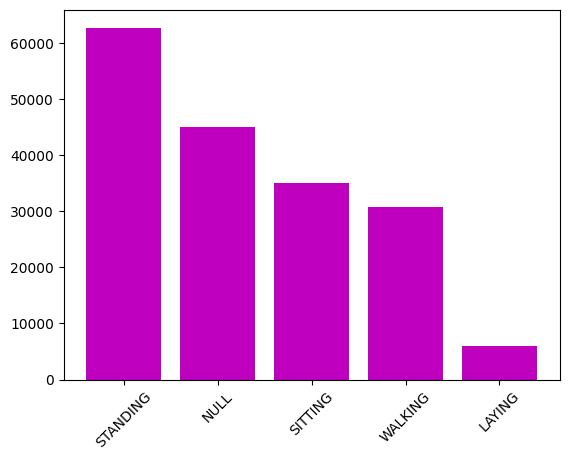

In [14]:
# class imbalance in the data for locomotion
import seaborn as sns
import matplotlib.pyplot as plt

labels= subject1_df[244]
print(labels.value_counts())
# provide a mapping from label val to activity
label_mapped = {0: 'NULL', 1: 'STANDING', 2: 'WALKING', 4: 'SITTING', 5: 'LAYING'}

labels = labels.map(label_mapped)
plt.bar(labels.value_counts().index, labels.value_counts().values, color = 'm')
plt.xticks(rotation = 45)
plt.show()

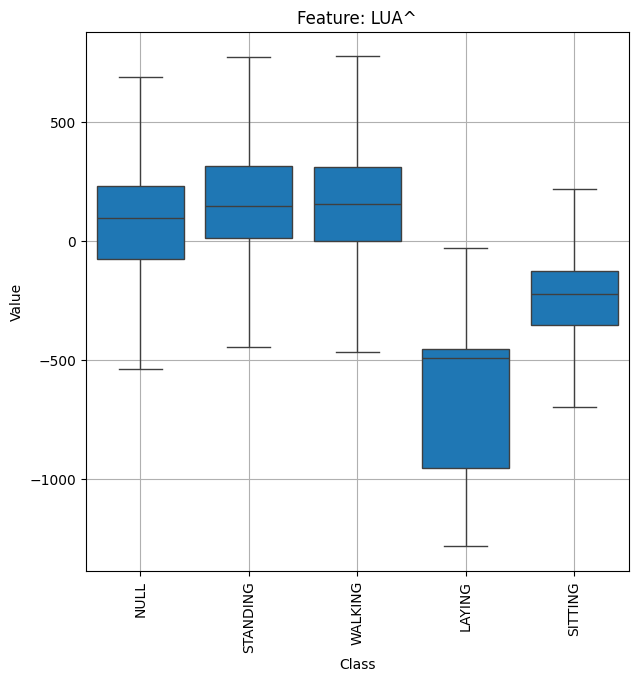

In [15]:
# UNIVARIATE ANALYSIS

# feature 8: 'LUA^'

# we will plot box and whisker plot for the univariate analysis
plt.figure(figsize= (7, 7))
x = subject1_df[244]
# map y labels to actual class names
x = x.map({0.0: 'NULL', 1.0: 'STANDING', 2.0: 'WALKING', 4.0: 'SITTING', 5.0: 'LAYING'})

sns.boxplot(x=x, y=8, data=subject1_df, showfliers=False, saturation=1)
plt.title('Feature: LUA^')
plt.xlabel('Class')
plt.ylabel('Value')
plt.xticks(rotation= 90)
plt.grid()

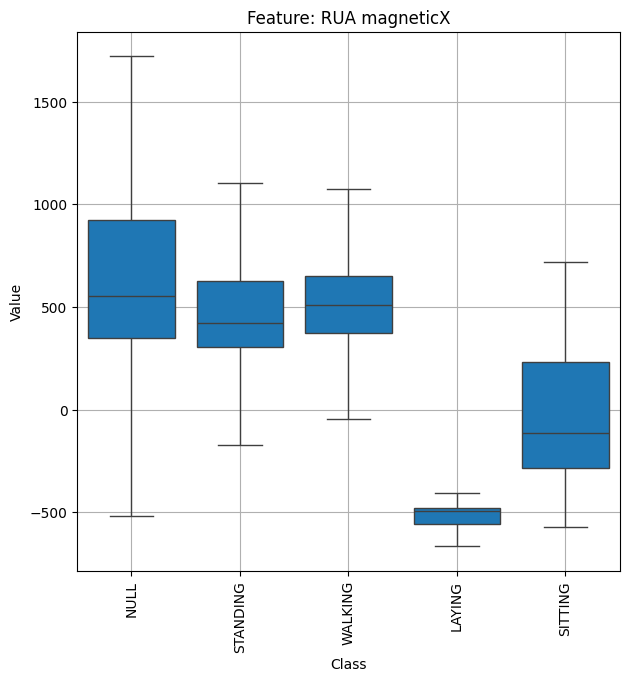

In [16]:
# UNIVARIATE ANALYSIS


# we will plot box and whisker plot for the univariate analysis
plt.figure(figsize= (7, 7))
x = subject1_df[244]
# map y labels to actual class names
x = x.map({0.0: 'NULL', 1.0: 'STANDING', 2.0: 'WALKING', 4.0: 'SITTING', 5.0: 'LAYING'})

sns.boxplot(x=x, y=57, data=subject1_df, showfliers=False, saturation=1)
plt.title('Feature: RUA magneticX')
plt.xlabel('Class')
plt.ylabel('Value')
plt.xticks(rotation= 90)
plt.grid()

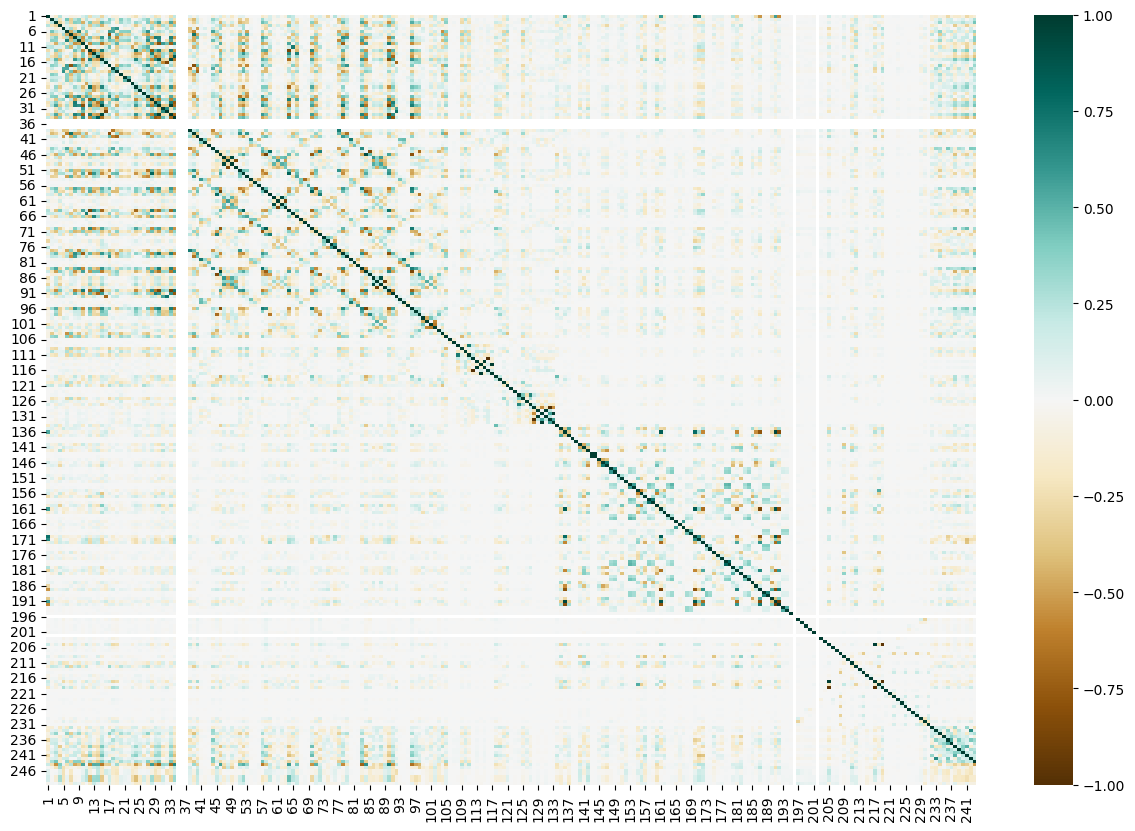

In [51]:
from pandas.plotting import scatter_matrix
df_corr = subject1_df.corr()
df_corr = df_corr.drop([244, 245, 246, 247, 248, 249, 250], axis = 1)

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=bool), cmap = "BrBG",ax=ax)
plt.show()

### MultiVariate feature analysis (TSNE) over all 561 features

In [21]:
from sklearn.manifold import TSNE

def perform_tsne(x_train, y_train, perplexities, n_iter= 1000):
  for index, per in enumerate(perplexities):
    print('Performing TSNE with perplexity {} and iterations {}'.format(per, n_iter))
    x_reduced= TSNE(verbose= 1, perplexity= per).fit_transform(x_train)
    print('done...')

    df= pd.DataFrame({'x':x_reduced[:,0], 'y':x_reduced[:,1], 'label':y_train})
    print('creating plot for TSNE visualization..')
    plt.figure(figsize= (7, 7))
    sns.lmplot(data= df, x= 'x', y= 'y', hue= 'label', fit_reg=False, palette= 'Set1', markers=['^','v','s','o', '1'])
    plt.title("perplexity : {} and max_iter : {}".format(per, n_iter))
    img_name = 'tsne' + '_perp_{}_iter_{}.png'.format(per, n_iter)

    print('saving this plot as image in present working directory...')
    plt.savefig(img_name)

In [20]:
y_pre_tsne = subject1_df[244]
X_pre_tsne = subject1_df.drop([244], axis=1).fillna(0.0)
perform_tsne(X_pre_tsne, y_pre_tsne, perplexities =[2,5,10,20,50])

Performing TSNE with perplexity 2 and iterations 1000
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 179690 samples in 0.541s...
[t-SNE] Computed neighbors for 179690 samples in 944.379s...
[t-SNE] Computed conditional probabilities for sample 1000 / 179690
[t-SNE] Computed conditional probabilities for sample 2000 / 179690
[t-SNE] Computed conditional probabilities for sample 3000 / 179690
[t-SNE] Computed conditional probabilities for sample 4000 / 179690
[t-SNE] Computed conditional probabilities for sample 5000 / 179690
[t-SNE] Computed conditional probabilities for sample 6000 / 179690
[t-SNE] Computed conditional probabilities for sample 7000 / 179690
[t-SNE] Computed conditional probabilities for sample 8000 / 179690
[t-SNE] Computed conditional probabilities for sample 9000 / 179690
[t-SNE] Computed conditional probabilities for sample 10000 / 179690
[t-SNE] Computed conditional probabilities for sample 11000 / 179690
[t-SNE] Computed conditional probabilities for sam

TypeError: lmplot() got an unexpected keyword argument 'size'

<Figure size 700x700 with 0 Axes>

### *1.3.2 Subject 2*

In [22]:
subject2_df =  concatenate_sensor_data(base_path, [(range(2, 3), range(1, 6))])
print(subject2_df)

/content/gdrive/MyDrive/Opportunity_extracted/data/S2-ADL1/S2-ADL1_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S2-ADL2/S2-ADL2_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S2-ADL3/S2-ADL3_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S2-ADL4/S2-ADL4_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S2-ADL5/S2-ADL5_sensors_data.txt
            1     2       3     4      5      6      7      8      9      10   \
0            33 -62.0  1052.0  -6.0   76.0  968.0  374.0 -484.0  392.0  783.0   
1            67 -31.0  1053.0 -27.0   90.0  932.0  385.0 -515.0  393.0  778.0   
2           100 -55.0  1029.0 -30.0   69.0  971.0  360.0 -533.0  387.0  755.0   
3           133 -64.0  1043.0 -28.0  102.0  952.0  384.0 -522.0  389.0  770.0   
4           167 -43.0  1040.0 -37.0   92.0  946.0  357.0 -558.0  398.0  747.0   
...         ...   ...     ...   ...    ...    ...    ...    ...    ...    ...   
171775  10606

In [23]:
subject2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171780 entries, 0 to 171779
Columns: 250 entries, 1 to 250
dtypes: float64(210), object(40)
memory usage: 327.6+ MB


In [24]:
subject2_df.describe()

,2,3,4,5,6,7,8,9,10,11,...,234,235,236,237,238,239,240,241,242,243
count,162762.000000,162762.000000,162762.00000,163482.000000,163482.000000,163482.000000,154555.000000,154555.000000,154555.000000,160755.000000,...,171501.000000,171501.000000,171501.000000,171501.000000,171501.000000,171501.000000,171501.000000,171501.000000,171501.000000,171501.000000
mean,-11.288249,812.222767,380.37666,13.220036,936.161480,182.366034,117.831316,795.323108,473.110310,737.596031,...,1291.423688,6020.286943,2341.720299,1264.399444,5731.823896,2265.137113,1371.004956,5085.592877,2258.107160,1390.389963
std,272.407999,402.453828,487.59818,231.452247,196.946961,268.632354,300.299802,231.532970,258.651594,238.867213,...,457.241267,1642.251192,998.834578,568.760295,1978.097553,1005.616206,562.665950,1636.237901,1143.932867,505.519141
min,-2872.000000,-1711.000000,-3602.00000,-1600.000000,-406.000000,-2168.000000,-3145.000000,-1829.000000,-4187.000000,-3595.000000,...,-855.000000,0.000000,0.000000,-1698.000000,0.000000,0.000000,-2580.000000,0.000000,0.000000,-2352.000000
25%,-93.000000,456.000000,-1.00000,-98.000000,914.000000,-10.000000,-9.000000,704.000000,330.000000,623.000000,...,1066.000000,4354.000000,1761.000000,852.000000,3949.000000,1687.000000,961.000000,3818.000000,1496.000000,1069.000000
50%,28.000000,986.000000,274.00000,10.000000,983.000000,152.000000,132.000000,843.000000,454.000000,777.000000,...,1260.000000,6037.000000,2204.000000,1259.000000,5458.000000,2180.000000,1322.000000,4941.000000,2017.000000,1375.000000
75%,117.000000,1042.000000,911.00000,126.000000,1013.000000,335.000000,275.000000,938.000000,651.000000,901.000000,...,1492.000000,7403.000000,2825.000000,1610.000000,7346.000000,2772.000000,1781.000000,6472.000000,2765.000000,1705.000000
max,2625.000000,4270.000000,4681.00000,1754.000000,2404.000000,2306.000000,4063.000000,3986.000000,4736.000000,3996.000000,...,3107.000000,10030.000000,5857.000000,3708.000000,10396.000000,6017.000000,2885.000000,9634.000000,5931.000000,3687.000000


In [25]:
print(subject2_df.shape)
nan_stats = subject2_df.isnull().sum().sort_values(ascending = False)/subject2_df.shape[0]

# print nan stats where the percentage is greater than 0.1 or 1%
print(nan_stats[nan_stats > 0.1])

(171780, 250)
37    0.456456
35    0.456456
36    0.456456
8     0.100274
9     0.100274
10    0.100274
dtype: float64


244
1    53010
4    40345
0    38599
2    34912
5     4914
Name: count, dtype: int64


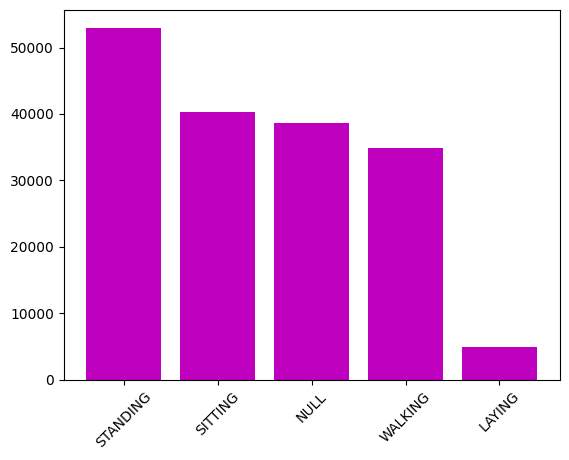

In [26]:
# class imbalance in the data for locomotion

labels= subject2_df[244]
print(labels.value_counts())
# provide a mapping from label val to activity
label_mapped = {0: 'NULL', 1: 'STANDING', 2: 'WALKING', 4: 'SITTING', 5: 'LAYING'}

labels = labels.map(label_mapped)
plt.bar(labels.value_counts().index, labels.value_counts().values, color = 'm')
plt.xticks(rotation = 45)
plt.show()

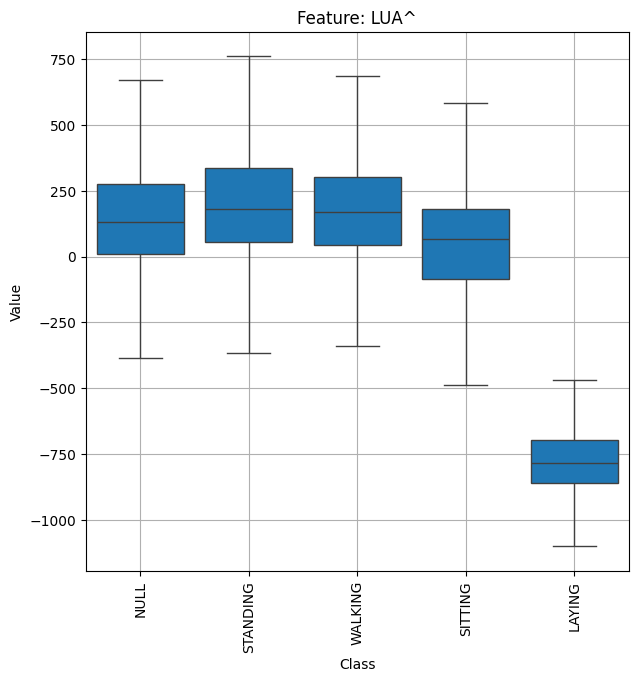

In [27]:
# UNIVARIATE ANALYSIS

# feature 8: 'LUA^'

# we will plot box and whisker plot for the univariate analysis
plt.figure(figsize= (7, 7))
x = subject2_df[244]
# map y labels to actual class names
x = x.map({0.0: 'NULL', 1.0: 'STANDING', 2.0: 'WALKING', 4.0: 'SITTING', 5.0: 'LAYING'})

sns.boxplot(x=x, y=8, data=subject2_df, showfliers=False, saturation=1)
plt.title('Feature: LUA^')
plt.xlabel('Class')
plt.ylabel('Value')
plt.xticks(rotation= 90)
plt.grid()

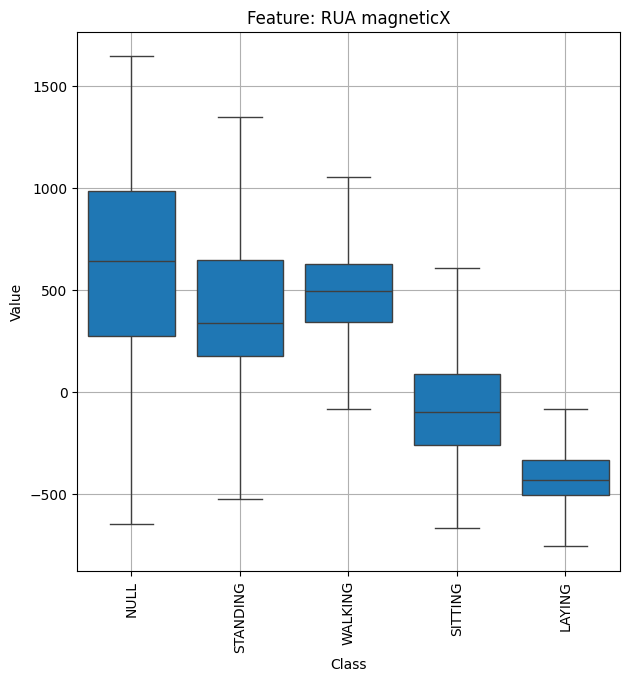

In [28]:
# UNIVARIATE ANALYSIS


# we will plot box and whisker plot for the univariate analysis
plt.figure(figsize= (7, 7))
x = subject2_df[244]
# map y labels to actual class names
x = x.map({0.0: 'NULL', 1.0: 'STANDING', 2.0: 'WALKING', 4.0: 'SITTING', 5.0: 'LAYING'})

sns.boxplot(x=x, y=57, data=subject2_df, showfliers=False, saturation=1)
plt.title('Feature: RUA magneticX')
plt.xlabel('Class')
plt.ylabel('Value')
plt.xticks(rotation= 90)
plt.grid()

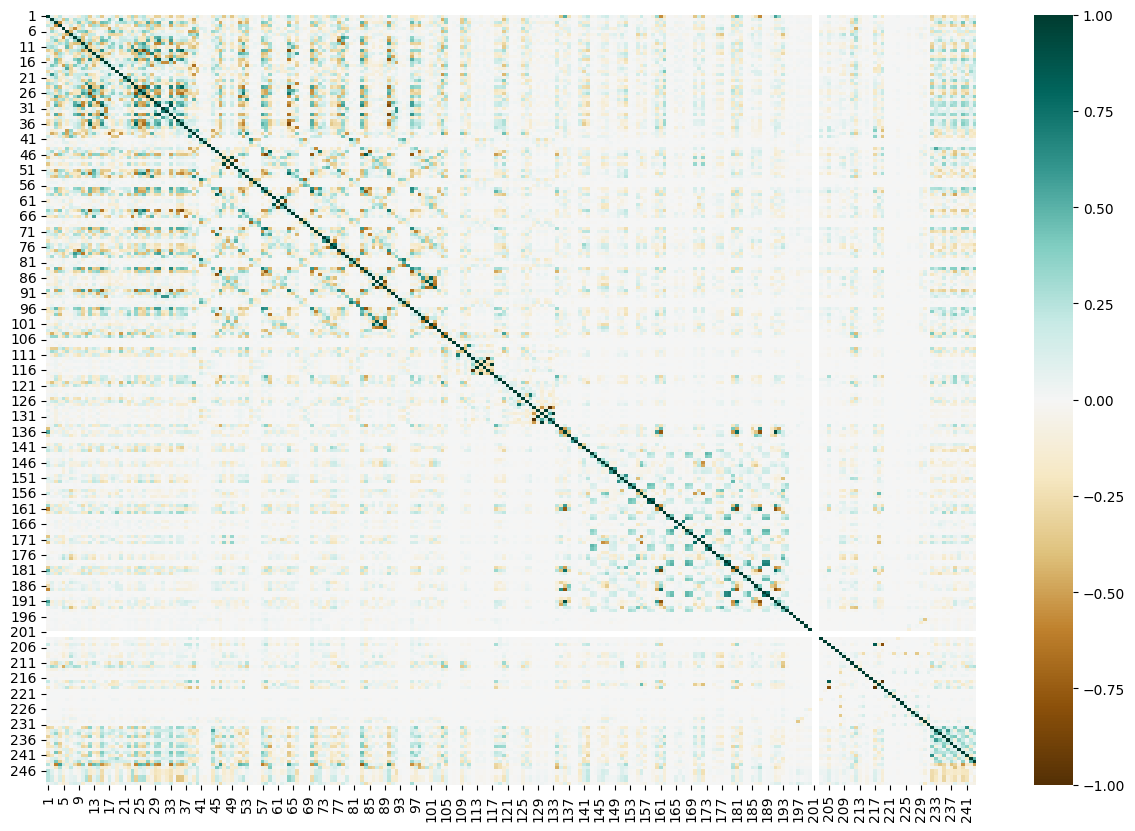

In [52]:
from pandas.plotting import scatter_matrix
df_corr = subject2_df.corr()
df_corr = df_corr.drop([244, 245, 246, 247, 248, 249, 250], axis = 1)

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=bool), cmap = "BrBG",ax=ax)
plt.show()

### *1.3.3 Subject 3*

In [29]:
subject3_df =  concatenate_sensor_data(base_path, [(range(3, 4), range(1, 6))])
print(subject3_df)

/content/gdrive/MyDrive/Opportunity_extracted/data/S3-ADL1/S3-ADL1_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S3-ADL2/S3-ADL2_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S3-ADL3/S3-ADL3_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S3-ADL4/S3-ADL4_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S3-ADL5/S3-ADL5_sensors_data.txt
           1     2     3       4     5       6      7      8     9      10   \
0           33  -9.0 -40.0  1011.0 -58.0  1001.0  140.0 -345.0  78.0  942.0   
1           67   0.0 -25.0  1016.0 -82.0  1012.0  136.0 -338.0  74.0  989.0   
2          100 -14.0 -24.0  1018.0 -96.0  1005.0  131.0 -347.0  84.0  962.0   
3          133 -16.0 -23.0  1046.0 -91.0  1013.0  133.0 -330.0  77.0  965.0   
4          167 -12.0 -14.0  1014.0 -94.0   998.0  123.0 -351.0  84.0  944.0   
...        ...   ...   ...     ...   ...     ...    ...    ...   ...    ...   
145931  882991   NaN   NaN 

In [30]:
subject3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145936 entries, 0 to 145935
Columns: 250 entries, 1 to 250
dtypes: float64(218), object(32)
memory usage: 278.4+ MB


In [31]:
subject3_df.describe()

,2,3,4,5,6,7,8,9,10,11,...,234,235,236,237,238,239,240,241,242,243
count,136196.000000,136196.000000,136196.000000,139982.000000,139982.000000,139982.000000,140220.000000,140220.000000,140220.000000,130904.000000,...,132811.000000,132811.000000,132811.000000,132811.000000,132811.000000,132811.000000,132811.000000,132811.000000,132811.000000,132811.000000
mean,122.516116,748.838270,490.732195,-423.130402,812.503079,7.900337,105.746641,801.512473,416.321181,153.449986,...,1464.471316,5827.009434,2367.997929,1354.804128,5863.619730,2198.826016,1372.045772,6073.574538,1845.154151,1408.236065
std,327.817720,404.271306,391.547177,234.006821,260.427180,310.928110,311.052302,293.718608,268.609598,275.683917,...,514.299242,1880.015977,1233.967565,662.488581,1895.960406,1116.101739,589.442088,1583.011836,1067.319884,419.051120
min,-2284.000000,-2114.000000,-2846.000000,-2276.000000,-909.000000,-2009.000000,-3514.000000,-1333.000000,-4024.000000,-5028.000000,...,-882.000000,0.000000,0.000000,-2508.000000,0.000000,0.000000,-2012.000000,0.000000,0.000000,-982.000000
25%,-50.000000,422.000000,282.000000,-559.000000,755.000000,-52.000000,-85.000000,711.000000,245.000000,3.000000,...,1200.000000,4394.500000,1402.000000,893.000000,4277.000000,1375.000000,1034.000000,4837.000000,1000.000000,1172.000000
50%,80.000000,910.000000,449.000000,-402.000000,892.000000,87.000000,108.000000,885.000000,357.000000,133.000000,...,1489.000000,5788.000000,2129.000000,1312.000000,6063.000000,2061.000000,1360.000000,5823.000000,1678.000000,1397.000000
75%,211.000000,992.000000,723.000000,-274.000000,961.000000,179.000000,282.000000,969.000000,571.000000,319.000000,...,1776.000000,7543.000000,2938.000000,1743.000000,7362.000000,2822.000000,1712.000000,6986.000000,2280.000000,1642.000000
max,4439.000000,3649.000000,4525.000000,1478.000000,2444.000000,1407.000000,4385.000000,2512.000000,5395.000000,3386.000000,...,3246.000000,10000.000000,5884.000000,4080.000000,10383.000000,5860.000000,4153.000000,10008.000000,5838.000000,3118.000000


In [32]:
print(subject3_df.shape)
nan_stats = subject3_df.isnull().sum().sort_values(ascending = False)/subject3_df.shape[0]

# print nan stats where the percentage is greater than 0.1 or 1%
print(nan_stats[nan_stats > 0.1])

(145936, 250)
22     0.164216
20     0.164216
21     0.164216
36     0.146626
37     0.146626
35     0.146626
139    0.117942
138    0.117942
137    0.117942
136    0.117942
135    0.117942
18     0.109637
17     0.109637
19     0.109637
13     0.103004
12     0.103004
11     0.103004
dtype: float64


244
1    55985
2    35880
4    23319
0    21616
5     9136
Name: count, dtype: int64


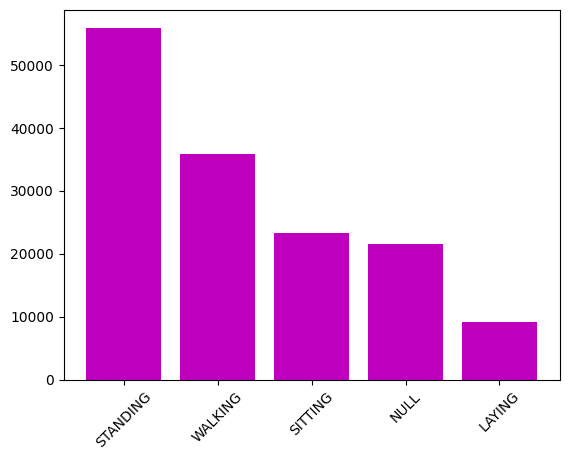

In [33]:
# class imbalance in the data for locomotion

labels= subject3_df[244]
print(labels.value_counts())
# provide a mapping from label val to activity
label_mapped = {0: 'NULL', 1: 'STANDING', 2: 'WALKING', 4: 'SITTING', 5: 'LAYING'}

labels = labels.map(label_mapped)
plt.bar(labels.value_counts().index, labels.value_counts().values, color = 'm')
plt.xticks(rotation = 45)
plt.show()

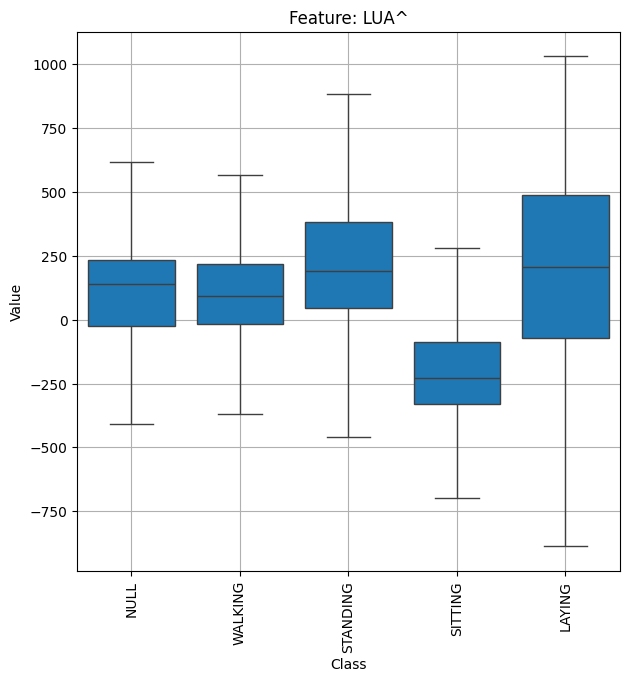

In [34]:
# UNIVARIATE ANALYSIS

# feature 8: 'LUA^'

# we will plot box and whisker plot for the univariate analysis
plt.figure(figsize= (7, 7))
x = subject3_df[244]
# map y labels to actual class names
x = x.map({0.0: 'NULL', 1.0: 'STANDING', 2.0: 'WALKING', 4.0: 'SITTING', 5.0: 'LAYING'})

sns.boxplot(x=x, y=8, data=subject3_df, showfliers=False, saturation=1)
plt.title('Feature: LUA^')
plt.xlabel('Class')
plt.ylabel('Value')
plt.xticks(rotation= 90)
plt.grid()

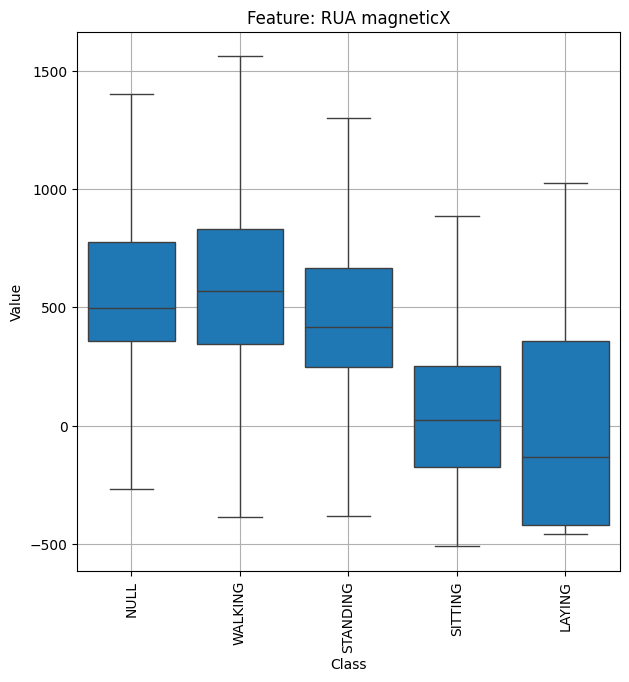

In [35]:
# UNIVARIATE ANALYSIS


# we will plot box and whisker plot for the univariate analysis
plt.figure(figsize= (7, 7))
x = subject3_df[244]
# map y labels to actual class names
x = x.map({0.0: 'NULL', 1.0: 'STANDING', 2.0: 'WALKING', 4.0: 'SITTING', 5.0: 'LAYING'})

sns.boxplot(x=x, y=57, data=subject3_df, showfliers=False, saturation=1)
plt.title('Feature: RUA magneticX')
plt.xlabel('Class')
plt.ylabel('Value')
plt.xticks(rotation= 90)
plt.grid()

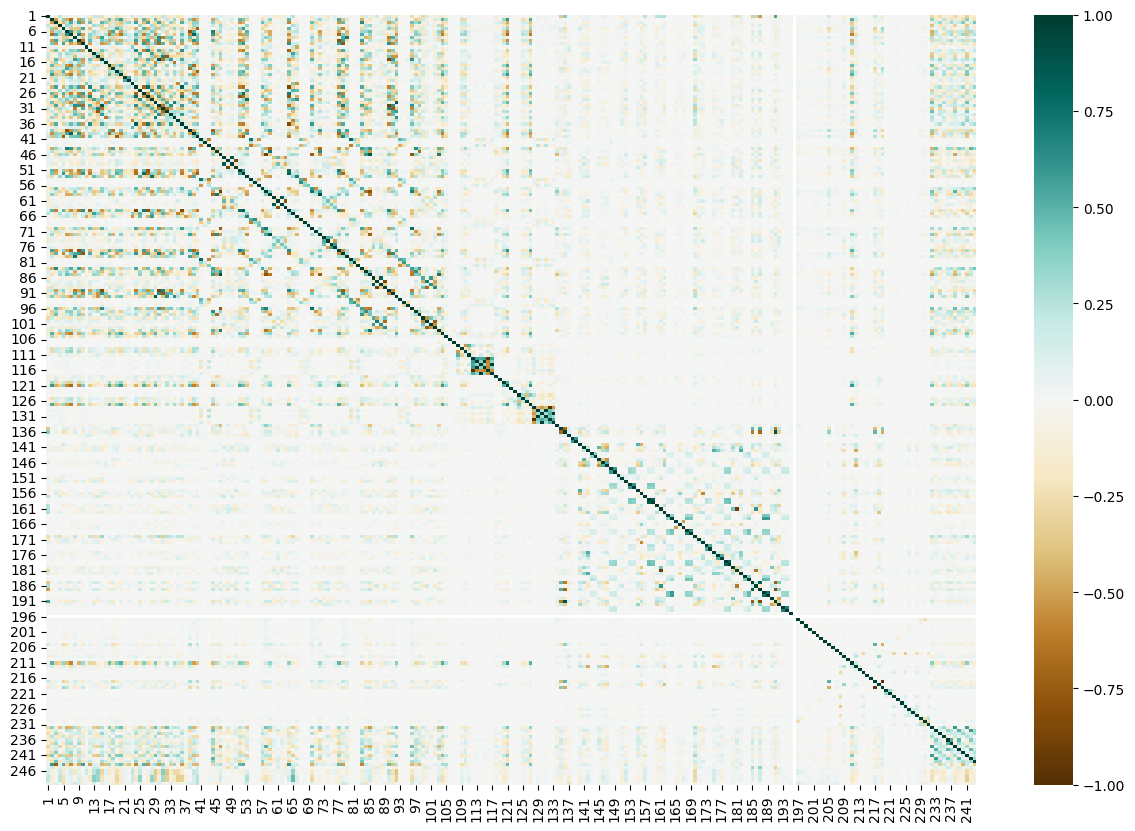

In [53]:
from pandas.plotting import scatter_matrix
df_corr = subject3_df.corr()
df_corr = df_corr.drop([244, 245, 246, 247, 248, 249, 250], axis = 1)

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=bool), cmap = "BrBG",ax=ax)
plt.show()

### *1.3.4 Subject 4*

In [36]:
subject4_df =  concatenate_sensor_data(base_path, [(range(4, 5), range(1, 6))])
print(subject4_df)

/content/gdrive/MyDrive/Opportunity_extracted/data/S4-ADL1/S4-ADL1_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S4-ADL2/S4-ADL2_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S4-ADL3/S4-ADL3_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S4-ADL4/S4-ADL4_sensors_data.txt
/content/gdrive/MyDrive/Opportunity_extracted/data/S4-ADL5/S4-ADL5_sensors_data.txt
            1     2       3     4     5      6      7      8      9      10   \
0            33 -18.0  1047.0  69.0  -9.0  931.0  462.0  450.0  861.0  367.0   
1            67 -12.0  1043.0  52.0 -38.0  924.0  463.0  502.0  839.0  367.0   
2           100   0.0  1021.0  48.0 -38.0  929.0  443.0  583.0  873.0  361.0   
3           133 -10.0  1031.0  59.0 -33.0  918.0  464.0  664.0  833.0  389.0   
4           167 -19.0  1050.0  59.0 -10.0  919.0  466.0  642.0  809.0  504.0   
...         ...   ...     ...   ...   ...    ...    ...    ...    ...    ...   
147204  1017390   Na

In [37]:
subject4_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147209 entries, 0 to 147208
Columns: 250 entries, 1 to 250
dtypes: float64(242), object(8)
memory usage: 280.8+ MB


In [38]:
subject4_df.describe()

,2,3,4,5,6,7,8,9,10,11,...,234,235,236,237,238,239,240,241,242,243
count,130578.000000,130578.000000,130578.000000,142586.00000,142586.000000,142586.000000,139718.000000,139718.000000,139718.000000,143846.000000,...,144233.000000,144233.000000,144233.000000,144233.000000,144233.000000,144233.000000,144233.000000,144233.000000,144233.000000,144233.000000
mean,198.929751,867.861998,293.713696,-75.25135,927.355582,252.468973,423.359968,752.340307,288.091212,471.374178,...,1379.709948,6135.902547,2207.985551,1303.399063,6401.782408,2220.077444,1366.518924,5779.176354,2062.429319,1358.203462
std,255.633078,1043.601978,455.793291,181.95110,208.981123,281.955156,197.095725,285.688187,350.252925,312.676922,...,459.514313,2033.585854,972.191767,505.554393,1909.875086,1051.449222,651.530868,1621.067501,1041.364282,504.484274
min,-2518.000000,-40015.000000,-6734.000000,-1529.00000,-183.000000,-1104.000000,-1493.000000,-890.000000,-4793.000000,-1431.000000,...,-1640.000000,0.000000,0.000000,-987.000000,0.000000,0.000000,-1505.000000,0.000000,0.000000,-1372.000000
25%,77.000000,823.000000,-5.000000,-146.00000,889.000000,134.000000,323.000000,653.000000,109.000000,236.000000,...,1237.000000,4290.000000,1647.000000,960.000000,4732.000000,1559.000000,930.000000,4590.000000,1506.000000,1072.000000
50%,224.000000,991.500000,168.000000,-37.00000,951.000000,291.000000,426.000000,826.000000,270.000000,418.500000,...,1442.000000,6188.000000,2158.000000,1319.000000,6393.000000,2078.000000,1382.000000,5559.000000,1907.000000,1417.000000
75%,341.000000,1035.000000,534.000000,36.00000,999.000000,405.000000,535.000000,920.000000,443.000000,733.000000,...,1632.000000,7848.000000,2641.000000,1670.000000,8098.000000,2675.000000,1819.000000,6958.000000,2353.000000,1623.000000
max,3531.000000,216713.000000,8104.000000,1539.00000,2948.000000,2688.000000,4109.000000,2131.000000,4676.000000,2364.000000,...,2563.000000,10333.000000,5891.000000,2838.000000,10060.000000,5888.000000,3211.000000,10128.000000,5876.000000,4122.000000


In [39]:
print(subject4_df.shape)
nan_stats = subject4_df.isnull().sum().sort_values(ascending = False)/subject4_df.shape[0]

# print nan stats where the percentage is greater than 0.1 or 1%
print(nan_stats[nan_stats > 0.1])

(147209, 250)
15     0.365902
16     0.365902
14     0.365902
164    0.246989
163    0.246989
162    0.246989
161    0.246989
160    0.246989
205    0.185199
202    0.185199
201    0.185199
206    0.185199
207    0.185199
204    0.185199
203    0.185199
197    0.185199
200    0.185199
195    0.185199
196    0.185199
198    0.185199
199    0.185199
157    0.185118
156    0.185118
159    0.185118
155    0.185118
158    0.185118
22     0.134720
21     0.134720
20     0.134720
29     0.115007
30     0.115007
31     0.115007
2      0.112975
4      0.112975
3      0.112975
dtype: float64


244
1    50952
0    42127
2    29456
4    19364
5     5310
Name: count, dtype: int64


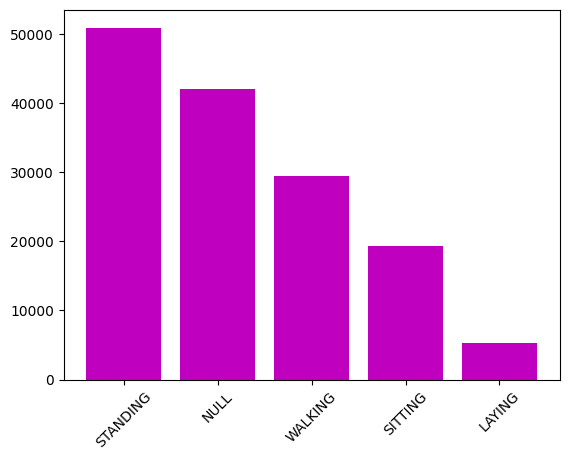

In [40]:
# class imbalance in the data for locomotion

labels= subject4_df[244]
print(labels.value_counts())
# provide a mapping from label val to activity
label_mapped = {0: 'NULL', 1: 'STANDING', 2: 'WALKING', 4: 'SITTING', 5: 'LAYING'}

labels = labels.map(label_mapped)
plt.bar(labels.value_counts().index, labels.value_counts().values, color = 'm')
plt.xticks(rotation = 45)
plt.show()

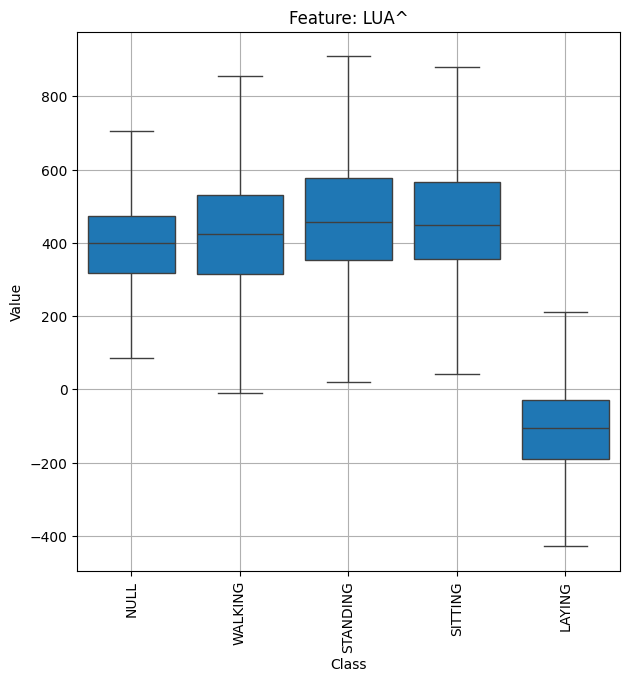

In [41]:
# UNIVARIATE ANALYSIS

# feature 8: 'LUA^'

# we will plot box and whisker plot for the univariate analysis
plt.figure(figsize= (7, 7))
x = subject4_df[244]
# map y labels to actual class names
x = x.map({0.0: 'NULL', 1.0: 'STANDING', 2.0: 'WALKING', 4.0: 'SITTING', 5.0: 'LAYING'})

sns.boxplot(x=x, y=8, data=subject4_df, showfliers=False, saturation=1)
plt.title('Feature: LUA^')
plt.xlabel('Class')
plt.ylabel('Value')
plt.xticks(rotation= 90)
plt.grid()

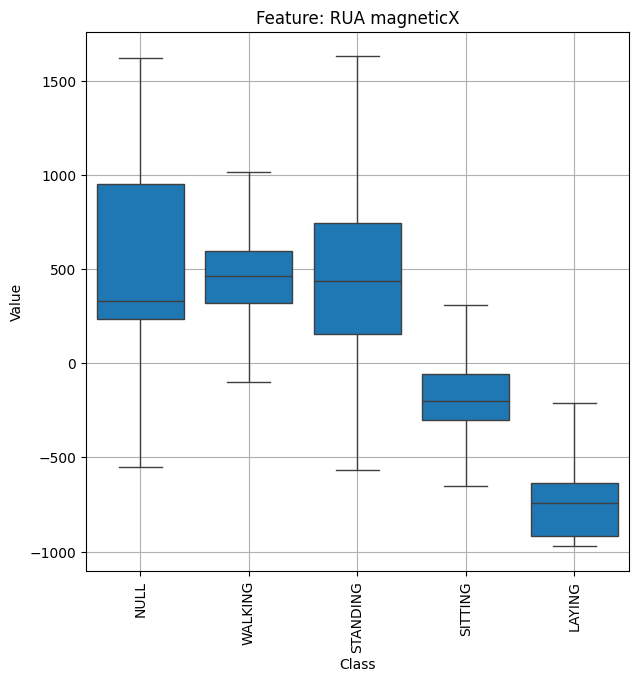

In [42]:
# UNIVARIATE ANALYSIS


# we will plot box and whisker plot for the univariate analysis
plt.figure(figsize= (7, 7))
x = subject4_df[244]
# map y labels to actual class names
x = x.map({0.0: 'NULL', 1.0: 'STANDING', 2.0: 'WALKING', 4.0: 'SITTING', 5.0: 'LAYING'})

sns.boxplot(x=x, y=57, data=subject4_df, showfliers=False, saturation=1)
plt.title('Feature: RUA magneticX')
plt.xlabel('Class')
plt.ylabel('Value')
plt.xticks(rotation= 90)
plt.grid()

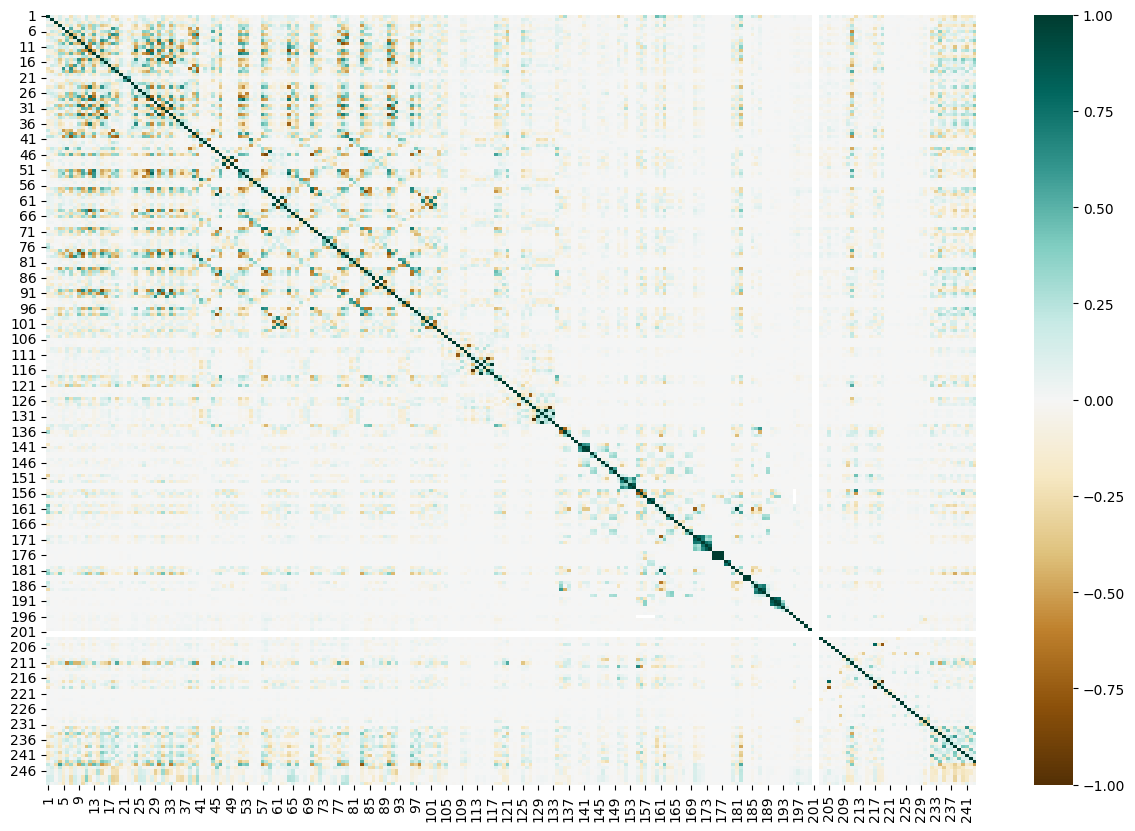

In [50]:
from pandas.plotting import scatter_matrix
df_corr = subject4_df.corr()
df_corr = df_corr.drop([244, 245, 246, 247, 248, 249, 250], axis = 1)

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=bool), cmap = "BrBG",ax=ax)
plt.show()